In [3]:
from matplotlib import pyplot as plt 
import numpy as np 
from PIL import Image 
import cv2 
import os 
%matplotlib inline 

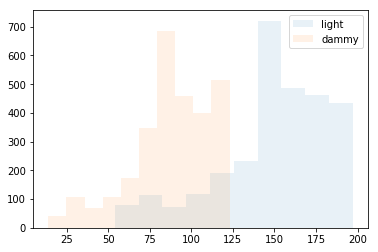

In [5]:
f1 = 'open/'
f2 = 'close/'
def cvt2gray(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img1 = cv2.imread(f1+'eye73.png')#正常光下拍摄
img2 = cv2.imread(f1+'eye88.png')#关灯后拍摄，但都是睁眼
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2 = cvt2gray(img2)
plt.hist(img1.ravel(),label = 'light',alpha = 0.1)
plt.hist(img2.ravel(),label = 'dammy',alpha = 0.1)
plt.legend()
plt.show()

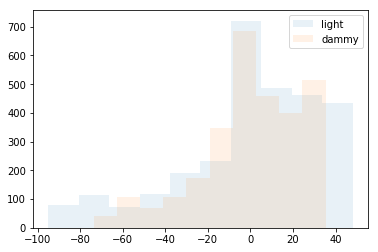

In [6]:
def mean2zero(img):
    return img-img.mean()

img1 = mean2zero(img1)
img2 = mean2zero(img2)

plt.hist(img1.ravel(),label = 'light',alpha = 0.1)
plt.hist(img2.ravel(),label = 'dammy',alpha = 0.1)
plt.legend()
plt.show()

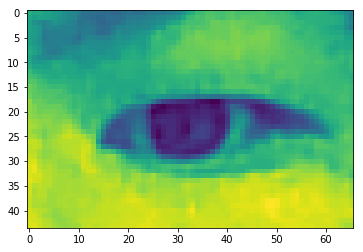

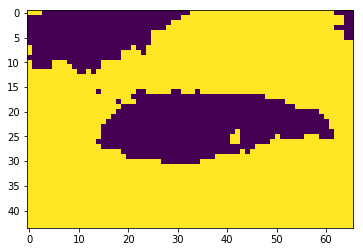

In [7]:
def img2bi(img,thre = -10,rev = False):
    img_bk = img.copy()
    img[img_bk>thre]=1
    img[img_bk<thre]=0
    return img

plt.imshow(img1)
img1 = img2bi(img1)
plt.figure()
plt.imshow(img1)
plt.show()

# 修正左上角的暗光影响

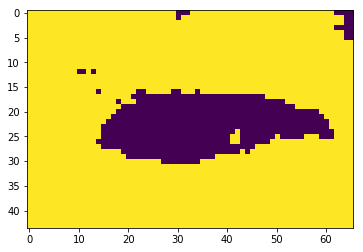

In [10]:
def img2bi(img,thre = -10,rev = True):
    img_bk = img.copy()
    img[img_bk>thre]=1
    img[img_bk<thre]=0
    if rev:
        img[:12,:30] = 1 
    return img

img1 = cv2.imread(f1+'eye73.png')#正常光下拍摄
img1 = cvt2gray(img1)
img1 = mean2zero(img1)
img1 = img2bi(img1)
plt.imshow(img1)
plt.show()

# 尝试过闭运算，但是闭运算在eye88.png上的效果会使眼睛打开，而不做闭运算已经可以用黑色像素点来算比例了。故舍弃闭运算处理。

In [15]:
def process(file):
    img1 = cv2.imread(file)#正常光下拍摄
    img1 = cvt2gray(img1)
    img1 = mean2zero(img1)
    img1 = img2bi(img1)
    return img1

# 鉴于反算非眼睛部分等效于算眼睛部分，故算白色像素点数占比来作为特征。

In [16]:
prop_ls_open = [] 
prop_ls_close = [] 
folder = f1 
for file in os.listdir(folder):
    file = folder+file
    img = process(file)
    prop_ls_open.append(img.sum()/img.size)
folder = f2 
for file in os.listdir(folder):
    file = folder+file
    img = process(file)
    prop_ls_close.append(img.sum()/img.size)

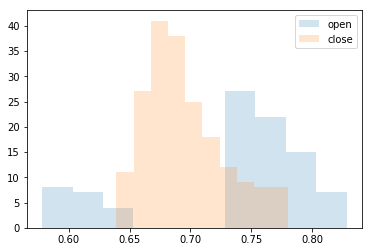

In [18]:
plt.hist(prop_ls_open,label = 'open',alpha = 0.2)
plt.hist(prop_ls_close,label = 'close',alpha = 0.2)
plt.legend()
plt.show()

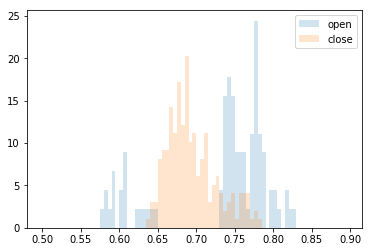

In [24]:
plt.hist(prop_ls_open,np.arange(0.5,0.9,0.005),density = True,label = 'open',alpha = 0.2)
plt.hist(prop_ls_close,np.arange(0.5,0.9,0.005),density = True,label = 'close',alpha = 0.2)
plt.legend()
plt.show()

# 应该是些眉毛等以及eye27这种身后背景导致的小误差，大致来讲，以0.725为分界面将最优。